## Task 1.1

Let's imagine that processes are human beings and they wanted to play ping-pong to get acquainted with each other. Processor 0 starts the play. It randomly passes a ball to 'i' and says its name.

Processor 'i' passes a ball to another guy 'j' saying all previous names in the mentioned order and says its own name. Passing occurs randomly; it means only processor 'i' knows who will be next, others don't know and they always need to be on the lookout. The game ends after N passes. Use the synchronous mode MPI_Ssend to send the data. (5 points)

In [ ]:
%%writefile Ping_Pong.cpp

#include <mpi.h>
#include "mpi.h"
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <iostream>
#include <cmath>
#include <string>

using namespace std;


void arrray(vector<int> &b,const int &N){
   for (int i = 0; i < N; i++) {
           b.push_back(i);
   }
}



int random_index(int aray_size, unsigned int &seed){
   int elem = rand_r(&seed) % aray_size;
   return elem;
}

void creating_mess(vector<int> &b, vector<int> &pass_mess, int &elem) {
    // choosing random element from array
   unsigned int seed = 0;
   pass_mess.push_back(b[elem]);
   b.erase(b.begin() + elem);
}

void printing(vector<int> &vec, string &name) {
    cout << name << endl;
    for (int i = 0; i < vec.size(); i++) {
            printf("%d ", vec[i]);
    }
    printf("\n");
}
int main(int argc, char ** argv) {
    int world_rank;
    int world_size;
    MPI_Status status;
    int ierr;
    
    double start, end, last;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);
    
    start = MPI_Wtime();
    
   int N = world_size;
   unsigned int seed = 0;
   vector<int> b;
   vector<int> message;
   vector<vector<int>> message1(N);

   string a;
   arrray(b,N);
   
   unsigned int aray_size = b.size();

   int sender, reciver;
   sender = random_index(aray_size, seed);
   aray_size = b.size();
   creating_mess(b, message, sender);

  int i = 1;
  while (b.size() > 0) {
     aray_size = b.size();
     reciver = random_index(aray_size, seed);
     
     if (world_rank == sender){

       MPI_Ssend(&message[0], message.size(), MPI_INT, b[reciver], 12, MPI_COMM_WORLD);
      // cout << "Process " << sender << " Send message to process " << b[reciver] << endl; 

     } else if (world_rank == b[reciver]) {
       message1[b[reciver]].resize(message.size());
       MPI_Recv(&message1[b[reciver]][0], message.size(), MPI_INT, sender, 12, MPI_COMM_WORLD, &status);
       
     }

   creating_mess(b, message, reciver);
   sender = message[message.size()-1];
   i += 1;
   }
   //printf("Hello! size %d rank %d\n", world_size, world_rank);
   //a = "Message";
   //printing(message1[world_rank],a);
   end = MPI_Wtime();
   last = end - start;
   cout << last << endl;
   MPI_Finalize();
   return 0;
}                              


Overwriting Ping_Pong.cpp


In [ ]:
!mpic++ Ping_Pong.cpp -o out

In [ ]:

!mpirun --allow-run-as-root -n 5 ./out

0.00220014
0.00131558
0.00230276
0.000669212
0.00058473


## Task 1.2

Then slightly modify the program. Now the processes just send the data with fixed length instead of sending all the previous names. Insert timing calls to measure the time taken by all the communications. You will need to time many ping-pong iterations to get a reasonable elapsed time, especially for small message lengths.

- Investigate how the time taken varies with the size of the message. You should fill in your results in the table from the presentation in Lecture 5 (3 points)

- Plot a graph of time against message size to determine the latency (i.e. the time taken for a message of zero length); plot a graph of the bandwidth to see how it varies with message size. (3 points)

In [130]:
%%writefile Ping_Pong.cpp

#include <mpi.h>
#include "mpi.h"
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <iostream>
#include <cmath>
#include <string>
#include <fstream>

using namespace std;


void arrray(vector<int> &b,const int &N){
   for (int i = 0; i < N; i++) {
           b.push_back(i);
   }
}



int random_index(int aray_size, unsigned int &seed){
   int elem = rand_r(&seed) % aray_size;
   return elem;
}

void creating_mess(vector<int> &b, vector<int> &pass_mess, int &elem, int &i) {
    // choosing random element from array
   unsigned int seed = 0;
   pass_mess[i] = (b[elem]);
  // b.erase(b.begin() + elem);
}

void printing(vector<int> &vec, string &name) {
    cout << name << endl;
    for (int i = 0; i < vec.size(); i++) {
            printf("%d ", vec[i]);
    }
    printf("\n");
}
int main(int argc, char ** argv) {
    int world_rank;
    int world_size;
    MPI_Status status;
    int ierr;

    //FILE *res;
    //res = fopen("./results1.txt", "a");
    ofstream res;          // поток для записи
    res.open("./results.txt");

    double start, end, last;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);
    
    start = MPI_Wtime();
   // num of itterations 
   int N = 20;
   
   // size of sent message
   int sizze = 10000000;

   unsigned int seed = 0;

   // vector of processed
   vector<int> b;
   arrray(b,world_size);
   unsigned int aray_size = b.size();

   // vector of message
   vector<int> message(sizze);
   vector<vector<int>> message1(N);

   string a;


   int sender, reciver;
   sender = random_index(aray_size, seed);
   aray_size = b.size();

   int m = 0;
   creating_mess(b, message, sender,m);

  for (m = 0; m < N; m++) {
  //while (b.size() > 0) {
     aray_size = b.size();
     do {
        reciver = random_index(aray_size, seed);
        //cout << reciver << ' ' << sender << endl;
     } while (reciver == sender);
     
     if (world_rank == sender){

       MPI_Ssend(&message[0], message.size(), MPI_INT, b[reciver], 12, MPI_COMM_WORLD);
      

     } else if (world_rank == b[reciver]) {
       message1[b[reciver]].resize(sizze);
       MPI_Recv(&message1[b[reciver]][0], message.size(), MPI_INT, sender, 12, MPI_COMM_WORLD, &status);
       
     }

   creating_mess(b, message, reciver, m);
   sender = message[m];
   
   }
   //printf("Hello! size %d rank %d\n", world_size, world_rank);
   //a = "Message";
   //printing(message1[world_rank],a);
   end = MPI_Wtime();
   int arr_size = sizeof(std::vector<int>) + (sizeof(int) * sizze);//(int)sizeof(buffer[0])*steps;
   last = end - start;
   double mess_time = last/N;
   //printf("Size of message: %d\t Iterations: %d\t Total time:%f\t Message time:%f\t Bandwidth:%f\n", arr_size, N, last, mess_time , arr_size/mess_time);
   cout << arr_size << "\t" << N << "\t" << last << "\t" << mess_time << "\t" << arr_size/mess_time << endl;
   //fclose(res);
   res.close();
   MPI_Finalize();
   return 0;
}                              


Overwriting Ping_Pong.cpp


In [131]:
!mpic++ Ping_Pong.cpp -o out

In [132]:
!mpirun --allow-run-as-root -n 5 ./out

40000024	20	2.00793	0.100397	3.9842e+08
40000024	20	2.03957	0.101978	3.9224e+08
40000024	20	2.1182	0.10591	3.77679e+08
40000024	20	2.14527	0.107264	3.72913e+08
40000024	20	2.14543	0.107272	3.72885e+08


#### Reading textfile

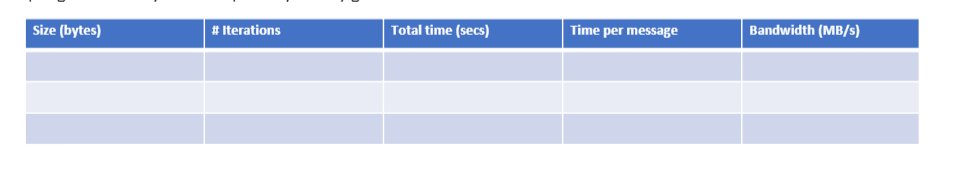

In [134]:
import numpy as np
import pandas as pd

with open("./results.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None, names = ['size', 'iterations','Total_time', 'Time per mess', 'Bandwidth']
                                  )
                    )

In [135]:
dat_grouped = df.groupby("size").mean()
dat_grouped['sizze'] = dat_grouped.index
dat_grouped

,iterations,Total_time,Time_per_mess,Bandwidth,sizze
size,,,,,
224.0,20.0,0.003931,0.000197,1518932.8,224.0
424.0,20.0,0.006892,0.000345,1419370.0,424.0
2024.0,20.0,0.007889,0.000394,5176188.0,2024.0
4024.0,20.0,0.002263,0.000113,36221640.0,4024.0
20024.0,20.0,0.004370,0.000219,91788600.0,20024.0
40024.0,20.0,0.003729,0.000186,234312400.0,40024.0
200024.0,20.0,0.011854,0.000593,343475600.0,200024.0
400024.0,20.0,0.028142,0.001407,284908400.0,400024.0
2000024.0,20.0,0.086709,0.004335,462327800.0,2000024.0


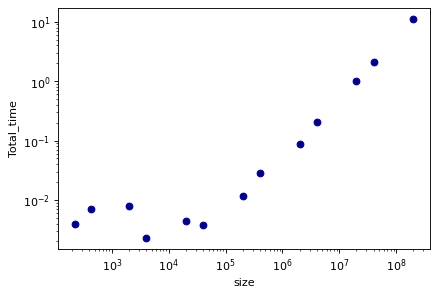

In [136]:
import matplotlib.pyplot as plt

plt.figure(dpi = 80)
plt.scatter(np.array(dat_grouped.index), np.array(dat_grouped['Total_time']), color = 'DarkBlue')
plt.xlabel('size')
plt.ylabel('Total_time')
plt.xscale("log")
plt.yscale("log")

## Task 2

Cellular Automata 1-d:

1) First: you initialize the one-dimensional array with ones and zeros (either randomly or not)

2) Second: you update the values in a cell according to the cell's current value and the left and right neighbors' current values.

So, the next state of the cell depends on the current state of 3 cells only.

Implement both periodic and constant boundary conditions (2 points)

Value updates can be parallelized if you divide the computational domain into chunks and allocate them to different processes (5 points)

Use ghost cells to send and receive values at interfaces between the two processes (2 points)

Design a program in such a way that any kind of rule can be easily inputted into the computations (5 points)

Make a graph that shows the speedup (2 points)

Draw the pictures of 3 interesting rule outputs (3 points)

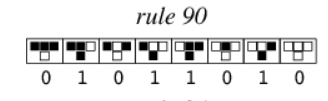

### Boundaryconditions? 

Implement both periodic and constant boundary conditions.

In [763]:
%%writefile Cellular_Automata.cpp


#include <mpi.h>
#include "mpi.h"
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <iostream>
#include <cmath>
#include <string>
#include <fstream>
using namespace std;

void printing(vector<int> &vec) {
    
    for (int i = 0; i < vec.size(); i++) {
            printf("%d ", vec[i]);
    }
    printf("\n");
}

void periodic_cond(vector<int> &array){
    vector<int> new_array = array;

    if ( (array[array.size()-1] == 0 and array[0] == 1 and  array[1] == 0)  or (array[array.size()-1] == 1 and array[0] == 0 and  array[1] == 1) or\
         (array[array.size()-1] == 0 and array[0] == 0 and  array[1] == 0)  or (array[array.size()-1] == 1 and array[0] == 1 and  array[1] == 1)) {
        new_array[0] = 0;
    } else {
        new_array[0] = 1;
    }
    
    for (int i = 1; i < array.size(); i++) {
        if ((array[i-1] == 0 and array[i] == 1 and  array[i+1] == 0)  | (array[i-1] == 1 and array[i] == 0 and  array[i+1] == 1) | \
            (array[i-1] == 0 and array[i] == 0 and  array[i+1] == 0) |  (array[i-1] == 1 and array[i] == 1 and  array[i+1] == 1)){
          new_array[i] = 0;
        } else {
           new_array[i] = 1;
        }
    }
   
   if ((array[array.size()-2] == 0 and array[array.size()-1] == 1 and  array[0] == 0)  | (array[array.size()-2] == 1 and array[array.size()-1] == 0 and  array[0] == 1) |\
       (array[array.size()-2] == 0 and array[array.size()-1] == 0 and  array[0] == 0)  | (array[array.size()-2] == 1 and array[array.size()-1] == 1 and  array[0] == 1)) {
        new_array[array.size()-1] = 0;
    } else {
        new_array[array.size()-1] = 1;
    }
    array = new_array;
    //printing(new_array);
    
}

void const_cond(vector<int> &array) {
    vector<int> new_array = array;
    for (int i = 1; i < array.size()-1; i++) {
        if ((array[i-1] == 1 and array[i+1] == 1) or (array[i-1] == 1 and array[i] == 0) or (array[i-1]==0 and array[i] == 0 and array[i+1] == 0) or (array[i-1]==0 and array[i] == 1 and array[i+1] == 0)){
          new_array[i] = 1;
    } else {
        new_array[i] = 0;
    }
    }  
    array = new_array;  
}

void initialization (vector<int>& init, int N) {
    init.resize(N);
    for (int i = 0; i < N; i++) {
        if (i < N / 2) {
            init[i] = 0;
        } else {
           init[i] = 1;
        }
    }
}


int main(){
    ofstream res;          // поток для записи
    res.open("./results1.txt");
    double start, end;
    vector<int> init ;
    int N = 11111124;
    initialization(init,N);
    //printing(init);
    
    start = MPI_Wtime();
    for (int k = 0; k < 24; k++) {
        periodic_cond(init);
        //printing(init);
    }
    end =  MPI_Wtime();
    cout << N << ' ' << end - start << endl;
    res.close();
    return 0;
}

Overwriting Cellular_Automata.cpp


In [764]:
!mpic++ Cellular_Automata.cpp -o out1

In [765]:
!mpirun --allow-run-as-root  ./out1

11111124 54.0178


In [767]:
import numpy as np
import pandas as pd

with open("./results1.txt") as file:
    df1 = pd.DataFrame(np.genfromtxt(file, delimiter=None, names = ['size', 'Total_time']
                                  )
                    )
df1

,size,Total_time
0,24.0,0.000220
1,124.0,0.000620
2,1124.0,0.004805
3,11124.0,0.054419
4,111124.0,0.484213
5,1111124.0,6.382350
6,11111124.0,54.017800


### Value updates can be parallelized if you divide the computational domain into chunks and allocate them to different processes (5 points)

### Use ghost cells to send and receive values at interfaces between the two processes (2 points)

In [777]:
%%writefile Cellular_Automata_parallel.cpp


#include <mpi.h>
#include "mpi.h"
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <unistd.h>
#include <vector>
#include<algorithm>
#include <cstdlib> 
#include <fstream>

using namespace std;

void printing(int *vec, int N) {
    
    for (int i = 0; i < N; i++) {
            printf("%d ", vec[i]);
    }
    printf("\n");
}

void initialization (vector<int>& init, int N) {
    init.resize(N);
    for (int i = 0; i < N; i++) {
        if (i < N / 2) {
            init[i] = 0;
        } else {
           init[i] = 1;
        }
    }
}


void periodic_cond(vector<int> &array){
    vector<int> new_array = array;

    for (int i = 1; i < array.size(); i++) {
        if ((array[i-1] == 0 and array[i] == 1 and  array[i+1] == 0)  | (array[i-1] == 1 and array[i] == 0 and  array[i+1] == 1) | \
            (array[i-1] == 0 and array[i] == 0 and  array[i+1] == 0) |  (array[i-1] == 1 and array[i] == 1 and  array[i+1] == 1)){
          new_array[i] = 0;
        } else {
           new_array[i] = 1;
        }
    }
   

    array = new_array;
    array.pop_back();
    array.erase(array.begin());
   
    //printing(new_array);
    
}



int main(int argc, char ** argv) {
    int world_size;
    int world_rank;
    ofstream res;          // поток для записи
    res.open("./results2.txt");
    
    MPI_Status status;

    
    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);
 

    int iterations = 24;
    int N = 31111124;
    int n_prank = N/world_size;

    vector<int> init;
    initialization (init, n_prank);
    double start,end;
    start = MPI_Wtime();
    for (int i = 0; i < iterations; i++) {    
           

	    init.insert(init.cbegin(),1);
      init.push_back(1);

      if (world_rank == 0) {
          MPI_Send(&init[1],             1, MPI_INT, world_size - 1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, 1,              5, MPI_COMM_WORLD, &status);
	    } else if (world_rank == world_size - 1) {
          MPI_Send(&init[1],             1, MPI_INT, world_rank-1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, 0,            5, MPI_COMM_WORLD, &status);
	    } else {
          MPI_Send(&init[1],             1, MPI_INT, world_rank - 1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, world_rank + 1, 5, MPI_COMM_WORLD, &status);
	    }
	    

	    if (world_rank == 0) {
          MPI_Send(&init[init.size()-2], 1, MPI_INT,  1, 3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_size - 1, 3, MPI_COMM_WORLD, &status);
	    } else if (world_rank == world_size - 1) {
          MPI_Send(&init[init.size()-2], 1, MPI_INT, 0,              3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_rank - 1, 3, MPI_COMM_WORLD, &status);
	    } else {
          MPI_Send(&init[init.size()-2], 1, MPI_INT, world_rank + 1, 3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_rank - 1, 3, MPI_COMM_WORLD, &status);
	    }
	    


	    end = MPI_Wtime();   
	    periodic_cond(init);
	    
	    
	    int * all_answer;
	    
	    if (world_rank == 0) {
          all_answer = (int *) malloc(n_prank * world_size * sizeof(int)); 
	    }

	    int *new_init;
	    new_init = (int *) malloc(n_prank * sizeof(int));  
	    for (int i = 0; i < n_prank; i++) {
          new_init[i] = init[i];
	    }
	    
	    MPI_Gather(&init[0],n_prank, MPI_INT, all_answer, n_prank, MPI_INT, 0, MPI_COMM_WORLD);
		       
	   // if (world_rank == 0) {
     //     printing(all_answer, n_prank * world_size);
     // }
    }
    
    cout << N <<' '<< (end - start) <<endl;
    MPI_Finalize();
    res.close();
    return 0;

}


Overwriting Cellular_Automata_parallel.cpp


In [778]:
!mpic++ Cellular_Automata_parallel.cpp -o out3


In [779]:
!mpirun --allow-run-as-root -n 4 ./out3

### Make a graph that shows the speedup 

In [782]:
import numpy as np
import pandas as pd

with open("./results2.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None, names = ['size', 'Total_time']
                                  )
                    )

In [783]:
dat_grouped = df.groupby("size").mean()
dat_grouped['sizze'] = dat_grouped.index
dat_grouped

,Total_time,sizze
size,,
24.0,0.006151,24.0
124.0,0.008575,124.0
1124.0,0.010042,1124.0
11124.0,0.040118,11124.0
111124.0,0.288043,111124.0
1111124.0,3.375000,1111124.0
11111124.0,38.968975,11111124.0


Text(0.5, 1.0, 'speedup for 2-d tasl')

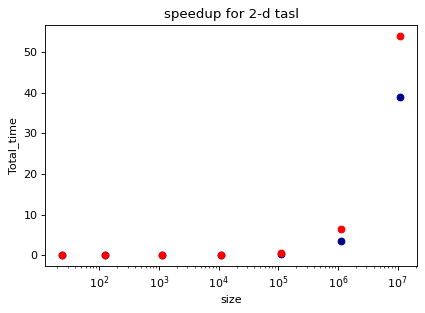

In [786]:
import matplotlib.pyplot as plt

plt.figure(dpi = 80)
plt.scatter(np.array(dat_grouped.index), np.array(dat_grouped['Total_time']), color = 'DarkBlue')
plt.scatter(np.array(df1['size']), np.array(df1['Total_time']), color = 'red')
plt.xlabel('size')
plt.ylabel('Total_time')
plt.xscale("log")

plt.title("speedup for 2-d tasl")

In [ ]:
import numpy as np
import pandas as pd

with open("./aut_2.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None
                                  )
                    )

from scipy import ndimage
picture = 1 - np.array(df)
rotated_img = ndimage.rotate(picture, 90)
rotated_img = ndimage.rotate(rotated_img, 90)
plt.imshow(rotated_img)
#plt.imshow(picture)
plt.axis('off')

### Design a program in such a way that any kind of rule can be easily inputted into the computations (5 points)

In [683]:
%%writefile Cellular_Automata_any_rules.cpp


#include <mpi.h>
#include "mpi.h"
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <iostream>
#include <cmath>
#include <string>
#include <fstream>
#include <time.h>
#include <unistd.h>
#include<algorithm>

using namespace std;



// const_cond rule
void periodic_cond(vector<int> &array, vector<int> &rule){
    vector<int> new_array = array;
    for (int i = 1; i < array.size()-1; i++) {
        if (array[i - 1] == 1 and array[i] == 1 and array[i + 1] == 1) {
                new_array[i] = rule[0];
        }
        else if (array[i - 1] == 1 and array[i] == 1 and array[i + 1] == 0) {
                new_array[i] = rule[1];
        }
        else if (array[i - 1] == 1 and array[i] == 0 and array[i + 1] == 1) {
                new_array[i] = rule[2];
        }
        else if (array[i - 1] == 1 and array[i] == 0 and array[i + 1] == 0) {
                new_array[i] = rule[3];
        }
        else if (array[i - 1] == 0 and array[i] == 1 and array[i + 1] == 1) {
                new_array[i] = rule[4];
        }
        else if (array[i - 1] == 0 and array[i] == 1 and array[i + 1] == 0) {
                new_array[i] = rule[5];
        }
        else if (array[i - 1] == 0 and array[i] == 0 and array[i + 1] == 1) {
                new_array[i] = rule[6];
        }
        else if (array[i - 1] == 0 and array[i] == 0 and array[i + 1] == 0) {
                new_array[i] = rule[7];
        }
    }
    array = new_array;
    array.pop_back();
    array.erase(array.begin());
   
    
}



void printing(int *vec, int N) {
    
    for (int i = 0; i < N; i++) {
            printf("%d ", vec[i]);
    }
    printf("\n");
}

void initialization (vector<int>& init, int N) {
    init.resize(N);
    for (int i = 0; i < N; i++) {
        if (i < N/2 ) {
            init[i] = 0;
        } else {
           init[i] = 1;
        }
    }
}





int main(int argc, char ** argv) {
    int world_size;
    int world_rank;
    ofstream res;          // поток для записи
    //res.open("./aut_5.txt");
    
    MPI_Status status;

    double start, end, last;
    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);
 

    int iterations = 24;
    int N = 24;
    int n_prank = N/world_size;

    vector<int> init;
   
    initialization (init, n_prank);
    string sLine = "";
    ifstream read;

    read.open("./ca.txt");

    int line_no = 0;
    char strr[16];
    char s[8];

    int r = 19;

    for (int i = 0; i < 256; i++ ) {
         read.getline(strr, 16);
         if (i == r){
            for (int l = 0; l < 16; l++) {
                
                s[l] = strr[l]; 
                
                
            }
           
         }
         
    }
    vector<int> rule(8);
    read.close();
    int k = 0;
    for (int l = 0; l < 16; l++) {
          if (l % 2 == 0) {
          rule[k] = (int)s[l] - 48;
          //cout << l << ' ' << vec[k] << endl; 
          k += 1;
          }
         
    }

    
    for (int i = 0; i < iterations; i++) {    
           

	    init.insert(init.cbegin(),1);
      init.push_back(1);

      if (world_rank == 0) {
          MPI_Send(&init[1],             1, MPI_INT, world_size - 1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, world_rank + 1, 5, MPI_COMM_WORLD, &status);
	    } else if (world_rank == world_size - 1) {
          MPI_Send(&init[1],             1, MPI_INT, world_rank-1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, 0,            5, MPI_COMM_WORLD, &status);
	    } else {
          MPI_Send(&init[1],             1, MPI_INT, world_rank - 1, 5, MPI_COMM_WORLD);
		      MPI_Recv(&init[init.size()-1], 1, MPI_INT, world_rank + 1, 5, MPI_COMM_WORLD, &status);
	    }
	    

	    if (world_rank == 0) {
          MPI_Send(&init[init.size()-2], 1, MPI_INT, world_rank + 1, 3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_size - 1, 3, MPI_COMM_WORLD, &status);
	    } else if (world_rank == world_size - 1) {
          MPI_Send(&init[init.size()-2], 1, MPI_INT, 0,              3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_rank - 1, 3, MPI_COMM_WORLD, &status);
	    } else {
          MPI_Send(&init[init.size()-2], 1, MPI_INT, world_rank + 1, 3, MPI_COMM_WORLD);
		      MPI_Recv(&init[0],             1, MPI_INT, world_rank - 1, 3, MPI_COMM_WORLD, &status);
	    }
	    


	       
	    //periodic_cond(init);
	    periodic_cond(init, rule);
	    
	    int * all_answer;
	    
	    if (world_rank == 0) {
          all_answer = (int *) malloc(n_prank * world_size * sizeof(int)); 
	    }

	    int *new_init;
	    new_init = (int *) malloc(n_prank * sizeof(int));  
	    for (int i = 0; i < n_prank; i++) {
          new_init[i] = init[i];
	    }
	    
	    MPI_Gather(&init[0],n_prank, MPI_INT, all_answer, n_prank, MPI_INT, 0, MPI_COMM_WORLD);
		       
	    if (world_rank == 0) {
          printing(all_answer, n_prank * world_size);
      }
    }
    
    
    MPI_Finalize();
    res.close();
    return 0;

}

Overwriting Cellular_Automata_any_rules.cpp


In [684]:
!mpic++ Cellular_Automata_any_rules.cpp -o out4


In [ ]:
!mpirun --allow-run-as-root -n 8 ./out4

### Draw the pictures of 3 interesting rule outputs (3 points)

(-0.5, 23.5, 23.5, -0.5)

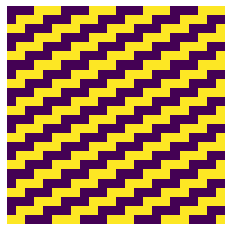

In [616]:
import numpy as np
import pandas as pd

with open("./aut_3.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None
                                  )
                    )

from scipy import ndimage
picture = 1 - np.array(df)
rotated_img = ndimage.rotate(picture, 90)
rotated_img = ndimage.rotate(rotated_img, 90)
plt.imshow(rotated_img)
#plt.imshow(picture)
plt.axis('off')

(-0.5, 23.5, 23.5, -0.5)

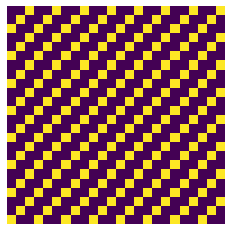

In [670]:
import numpy as np
import pandas as pd

with open("./aut_5.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None
                                  )
                    )

from scipy import ndimage
picture = 1 - np.array(df)
rotated_img = ndimage.rotate(picture, 90)
rotated_img = ndimage.rotate(rotated_img, 90)
plt.imshow(rotated_img)
#plt.imshow(picture)
plt.axis('off')

(-0.5, 23.5, 23.5, -0.5)

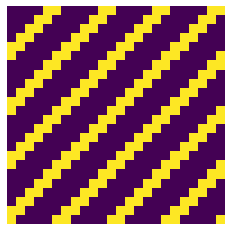

In [620]:
import numpy as np
import pandas as pd

with open("./aut_4.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None
                                  )
                    )

from scipy import ndimage
picture = 1 - np.array(df)
rotated_img = ndimage.rotate(picture, 90)
rotated_img = ndimage.rotate(rotated_img, 90)
plt.imshow(rotated_img)
#plt.imshow(picture)
plt.axis('off')

## The most beautiful one

(-0.5, 22.5, 23.5, -0.5)

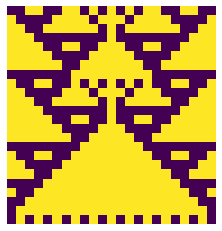

In [275]:
import numpy as np
import pandas as pd

with open("./aut_1.txt") as file:
    df = pd.DataFrame(np.genfromtxt(file, delimiter=None
                                  )
                    )

from scipy import ndimage
picture = 1 - np.array(df)
rotated_img = ndimage.rotate(picture, 90)
rotated_img = ndimage.rotate(rotated_img, 90)
plt.imshow(rotated_img)
#plt.imshow(picture)
plt.axis('off')